# Recommendation systems

### Import of necessary packages

In [1]:
import pandas as pd
import numpy as np
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV
import matplotlib.pyplot as plt
from surprise import accuracy, Dataset
from surprise import SVD, SVDpp, NMF
from scipy.io import loadmat

### Data loading

In [2]:
data = Dataset.load_builtin(name='ml-100k', prompt=False)

In [3]:
df = pd.DataFrame(data.raw_ratings, columns=["user_id", "item_id", "rating", "unix_timestamp"])
df.head()

,user_id,item_id,rating,unix_timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596


In [4]:
df.describe()

,rating
count,100000.000000
mean,3.529860
std,1.125674
min,1.000000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


### The SVD model

In [5]:
# Initialize the model
algo = SVD()

# Run 5-fold cross-validation and print results
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9395  0.9462  0.9370  0.9265  0.9353  0.9369  0.0064  
MAE (testset)     0.7403  0.7472  0.7393  0.7301  0.7367  0.7387  0.0055  
Fit time          2.23    2.28    2.22    2.37    2.25    2.27    0.05    
Test time         0.39    0.27    0.36    0.31    0.28    0.32    0.05    


{'test_rmse': array([0.93954249, 0.94620622, 0.9370418 , 0.92646098, 0.93531868]),
 'test_mae': array([0.74033208, 0.74721057, 0.73933261, 0.73012692, 0.73665542]),
 'fit_time': (2.2315869331359863,
  2.278301954269409,
  2.223738193511963,
  2.3737025260925293,
  2.2535314559936523),
 'test_time': (0.3933284282684326,
  0.2685985565185547,
  0.3580758571624756,
  0.30671262741088867,
  0.2760810852050781)}

In [8]:
# Splitting up the dataset.
trainset, testset = train_test_split(data, test_size=.25)

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9352


0.9351586338178312

In [6]:
# Set a baseline with a simple grid search
param_grid = {'n_epochs': [10, 15, 20],
              'lr_all': [0.002, 0.005, 0.01],
              'reg_all': [0.6, 0.8, 1.0]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9682674369286618
{'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.6}


In [26]:
# Initialize the model with the best parameters
best_model_SVD = SVD(n_epochs=20, lr_all=0.01, reg_all=0.6)

# Train the best_model_SVD on the trainset, and predict ratings for the testset
best_model_SVD.fit(trainset)
predictions_SVD = best_model_SVD.test(testset)

# Then compute RMSE
accuracy.rmse(predictions_SVD)

RMSE: 0.9630


0.9629902735721497

### The SVD++ model

In [10]:
# Initialize the model
algo_SVDpp = SVDpp()

# Run 5-fold cross-validation and print results
cross_validate(algo_SVDpp, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9293  0.9191  0.9172  0.9130  0.9223  0.9202  0.0055  
MAE (testset)     0.7275  0.7187  0.7192  0.7159  0.7261  0.7215  0.0045  
Fit time          12.33   12.17   12.14   13.32   12.62   12.52   0.44    
Test time         2.37    2.51    2.36    2.55    2.35    2.43    0.09    


{'test_rmse': array([0.92926012, 0.91908997, 0.91718678, 0.9129741 , 0.92226618]),
 'test_mae': array([0.72746325, 0.71874564, 0.71924436, 0.71592385, 0.7260769 ]),
 'fit_time': (12.333916187286377,
  12.171581983566284,
  12.136972427368164,
  13.322959423065186,
  12.621006965637207),
 'test_time': (2.3698489665985107,
  2.508877754211426,
  2.3606884479522705,
  2.55305552482605,
  2.345254898071289)}

In [11]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo_SVDpp.fit(trainset)
predictions = algo_SVDpp.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9163


0.9163253220884121

In [12]:
# Set a baseline with a simple grid search
param_grid = {'n_epochs': [10, 15, 20],
              'lr_all': [0.002, 0.005, 0.01],
              'reg_all': [0.6, 0.8, 1.0]}
gs = GridSearchCV(SVDpp, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9681102876340139
{'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.6}


In [27]:
# Initialize the model with the best parameters
best_model_SVDpp = SVDpp(n_epochs=20, lr_all=0.01, reg_all=0.6)

# Train the best_model_SVD on the trainset, and predict ratings for the testset
best_model_SVDpp.fit(trainset)
predictions_SVDpp = best_model_SVDpp.test(testset)

# Then compute RMSE
accuracy.rmse(predictions_SVDpp)

RMSE: 0.9630


0.9629864706119904

### The NMF model

In [14]:
# Initialize the model
algo_NMF = NMF()

# Run 5-fold cross-validation and print results
cross_validate(algo_NMF, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9668  0.9588  0.9618  0.9658  0.9579  0.9622  0.0036  
MAE (testset)     0.7576  0.7562  0.7587  0.7580  0.7526  0.7566  0.0022  
Fit time          1.16    1.00    0.88    0.90    0.87    0.96    0.11    
Test time         0.13    0.06    0.07    0.06    0.06    0.08    0.03    


{'test_rmse': array([0.96678594, 0.95879077, 0.96175923, 0.96583942, 0.95790485]),
 'test_mae': array([0.75758156, 0.75624173, 0.7587121 , 0.75795921, 0.75259343]),
 'fit_time': (1.1635971069335938,
  0.9961662292480469,
  0.8784220218658447,
  0.8956847190856934,
  0.8682370185852051),
 'test_time': (0.12999677658081055,
  0.06302762031555176,
  0.06548380851745605,
  0.06292057037353516,
  0.06318783760070801)}

In [15]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo_NMF.fit(trainset)
predictions = algo_NMF.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

RMSE: 0.9655


0.965513198459131

In [21]:
# Set a baseline with a simple grid search
param_grid = {
    'n_factors': [10, 15, 20],  
    'n_epochs': [20, 30, 40],   
    'lr_bu': [0.002, 0.005, 0.01], 
    'lr_bi': [0.002, 0.005, 0.01],  
    'reg_pu': [0.02, 0.04, 0.06],  
    'reg_qi': [0.02, 0.04, 0.06],   
}
gs = GridSearchCV(NMF, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9736098161740974
{'n_factors': 15, 'n_epochs': 40, 'lr_bu': 0.002, 'lr_bi': 0.01, 'reg_pu': 0.06, 'reg_qi': 0.06}


In [30]:
# Initialize the model with the best parameters
best_model_NMF = NMF(n_factors=15, n_epochs=40, lr_bu=0.002, lr_bi=0.01, reg_pu=0.06, reg_qi=0.06)

# Train the best_model_SVD on the trainset, and predict ratings for the testset
best_model_NMF.fit(trainset)
predictions_NMF = best_model_NMF.test(testset)

# Then compute RMSE
accuracy.rmse(predictions_NMF)

RMSE: 0.9683


0.9682502110524741

### Analysis of the results of the SVD, SVD++ and NMF algorithms with the best parameters

RMSE: 0.9630
RMSE: 0.9630
RMSE: 0.9683
MAE:  0.7752
MAE:  0.7752
MAE:  0.7611


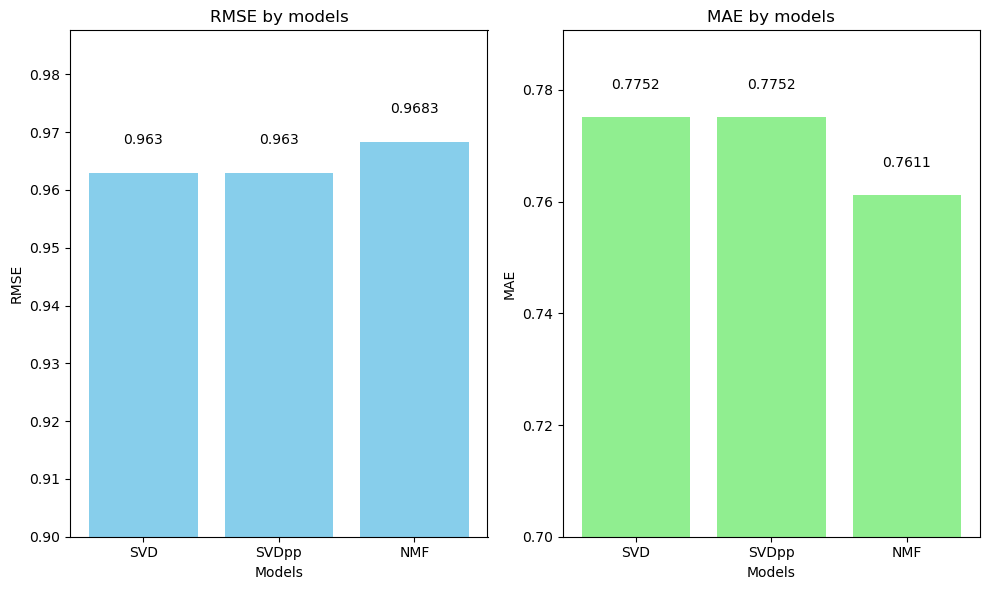

In [43]:
# Visualization of model results
models = ['SVD', 'SVDpp', 'NMF']
rmse_scores = [accuracy.rmse(predictions_SVD),
               accuracy.rmse(predictions_SVDpp),
               accuracy.rmse(predictions_NMF)]
mae_scores = [accuracy.mae(predictions_SVD),
              accuracy.mae(predictions_SVDpp),
              accuracy.mae(predictions_NMF)]

# Creating a chart
plt.figure(figsize=(10, 6))

# Сhart RMSE
plt.subplot(1, 2, 1)
plt.bar(models, rmse_scores, color='skyblue')
plt.title('RMSE by models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.ylim(0.9, max(rmse_scores) * 1.02)
for i, v in enumerate(rmse_scores):
    plt.text(i, v + 0.005, str(round(v, 4)), ha='center')

# Сhart MAE
plt.subplot(1, 2, 2)
plt.bar(models, mae_scores, color='lightgreen')
plt.title('MAE by models')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.ylim(0.7, max(mae_scores) * 1.02)
for i, v in enumerate(mae_scores):
    plt.text(i, v + 0.005, str(round(v, 4)), ha='center')

plt.tight_layout()
plt.show()

#### Conclusion: the NMF algorithm showed the best results by RMSE, but the worst result by MAE